In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [4]:
df = pd.read_csv('Social_Network_Ads.csv')
print(df.head()) 

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [5]:
print("\nNull Values in Dataset:")
print(df.isnull().sum())




Null Values in Dataset:
User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [6]:
if 'Gender' in df.columns:
    label_encoder = LabelEncoder()
    df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Encode Male=1, Female=0


In [7]:
selected_features = ['Age', 'EstimatedSalary', 'Gender'] 
X = df[selected_features]  # Independent variables
y = df['Purchased']  # Target variable (1 = Purchased, 0 = Not Purchased)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

In [11]:
y_pred = logreg.predict(X_test)


In [12]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("\nConfusion Matrix:")
print(cm)



Accuracy: 0.89
Precision: 0.91
Recall: 0.75

Confusion Matrix:
[[50  2]
 [ 7 21]]


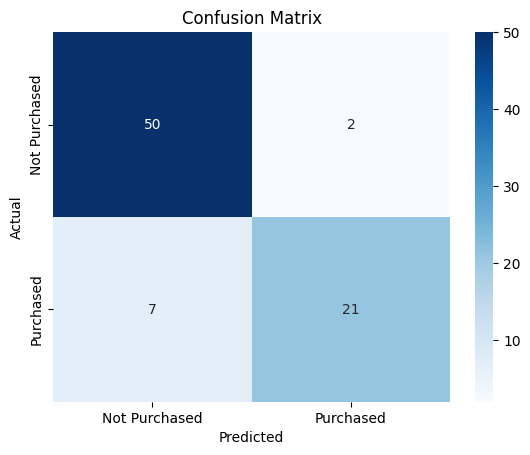

In [18]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_3536\2840523731.py:2: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1],c = ListedColormap(('red', 'green'))(i), label = j)


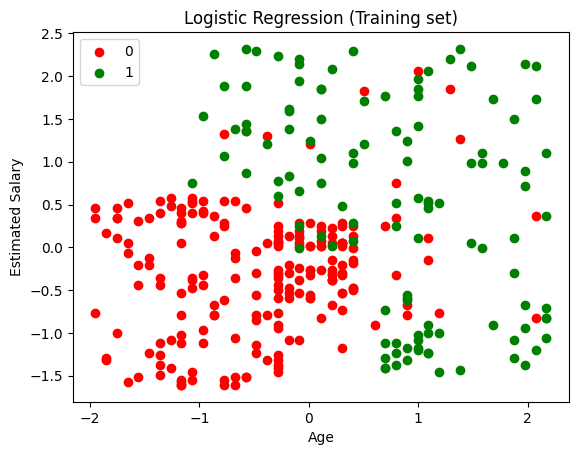

In [23]:

for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1],c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
